In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

'''
Part 8

Different plots based on data.xlsx
'''

df= pd.read_excel('C:/Users/janro/OneDrive - Universität Bayreuth/5u6Semester/Bachelorarbeit/data_re.xlsx', index_col=0)
df=df[['filingDate', 'reportDate', 'tone','abnormal_return', 'change', '% negative', 'change_abs','number of words'] ]
print(df)

     filingDate reportDate      tone  abnormal_return    change  % negative  \
5    2016-02-19 2015-12-31 -0.276316        -0.000735       NaN    1.828866   
4    2017-02-17 2016-12-31 -0.363281         0.011969  0.155907    2.113998   
3    2018-02-16 2017-12-31 -0.324402         0.003598 -0.088641    1.926611   
2    2019-02-22 2018-12-31 -0.298522         0.018379 -0.051254    1.827865   
1    2020-02-21 2019-12-31 -0.334702        -0.011829  0.003121    1.833568   
...         ...        ...       ...              ...       ...         ...   
4121 2021-05-28 2021-03-31 -0.415265        -0.003945 -0.012031    2.432084   
4124 2021-02-05 2020-12-31 -0.386018         0.000324       NaN    2.201091   
4125 2021-02-09 2020-12-31 -0.429625        -0.065966       NaN    2.478951   
4127 2020-05-07 2019-12-31 -0.166667        -0.026722       NaN    0.739567   
4126 2021-03-01 2020-12-31 -0.490446        -0.078933  3.052503    2.997097   

      change_abs  number of words  
5            Na

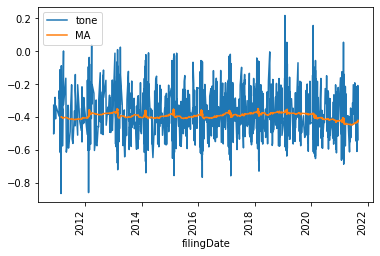

Average tone: -0.38685635785770794
Average tone since March 2020: -0.4202525508847242


In [2]:
df["filingDate"] = pd.to_datetime(df["filingDate"])
df1 = df.sort_values('filingDate', ascending=True)
df1.fillna(0, inplace=True)
df1['MA'] = df1['tone'].rolling(window=100).mean()
df1.plot(x="filingDate", y=["tone", "MA"], kind="line")
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

print('Average tone:',df['tone'].mean())
df_covid= df.loc[(df['reportDate'] > '2020-03-1')]
print('Average tone since March 2020:', df_covid['tone'].mean())

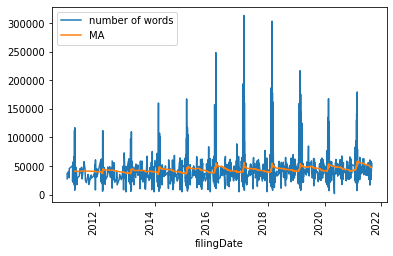

Average number of words: 46305.062668298655


<AxesSubplot:title={'center':'number of words'}, ylabel='Frequency'>

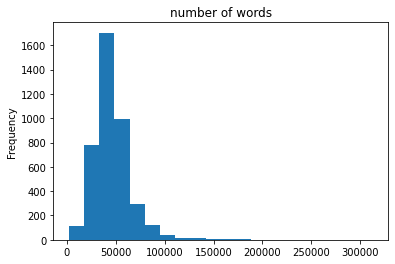

In [3]:
df["filingDate"] = pd.to_datetime(df["filingDate"])
df1 = df.sort_values('filingDate', ascending=True)
df1.fillna(0, inplace=True)
df1['MA'] = df1['number of words'].rolling(window=100).mean()
df1.plot(x="filingDate", y=["number of words", "MA"], kind="line")
plt.xticks(rotation='vertical')
plt.legend(loc='upper left')
plt.show()

print('Average number of words:',df['number of words'].mean())

df['number of words'].plot.hist(bins=20, title='number of words', xlabel="Tone")

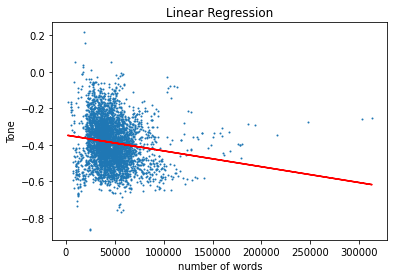

-0.1471730641391617
(4085, 8)


In [5]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, 'number of words'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.loc[:, 'tone'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.xlabel('number of words')
plt.ylabel('Tone')
plt.title('Linear Regression')
plt.show()

correlation = df['number of words']. corr(df['tone'])
print(correlation)
print(df.shape)

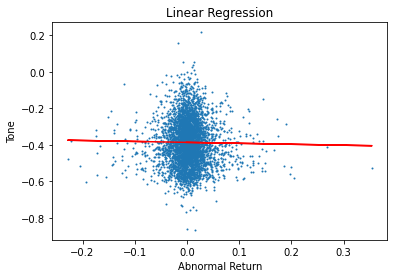

-0.014152149280790616
(4085, 8)


In [6]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, 'abnormal_return'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df.loc[:, 'tone'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('Tone')
plt.title('Linear Regression')
plt.show()

correlation = df['abnormal_return']. corr(df['tone'])
print(correlation)
print(df.shape)


(1632, 8)
-0.28598278885864614


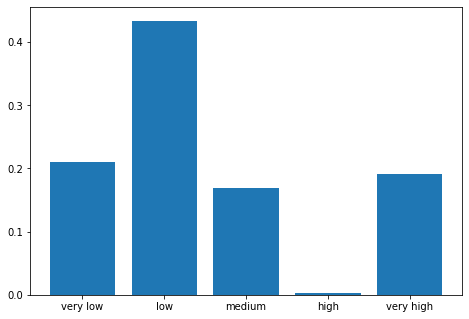

In [7]:
df_vlow= df[df['tone']>df['tone'].quantile(0.1)]
df_low=df[(df['tone']>df['tone'].quantile(0.1)) & (df['tone']<df['tone'].quantile(0.3))]
df_medium=df[(df['tone']>df['tone'].quantile(0.3)) & (df['tone']<df['tone'].quantile(0.7))]
df_high=df[(df['tone']>df['tone'].quantile(0.7)) & (df['tone']<df['tone'].quantile(0.9))]
df_vhigh= df[df['tone']<df['tone'].quantile(0.9)]
print(df_medium.shape)
print(df['tone'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()


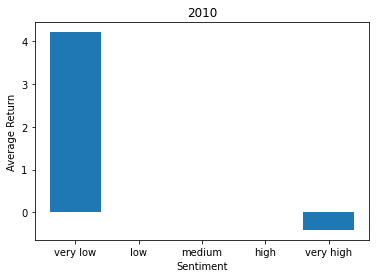

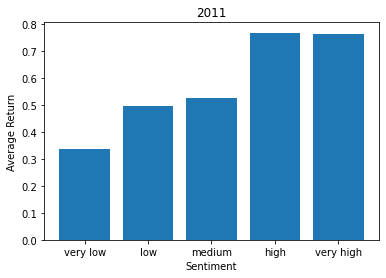

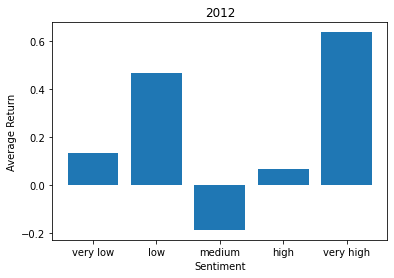

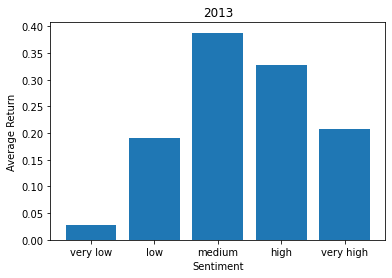

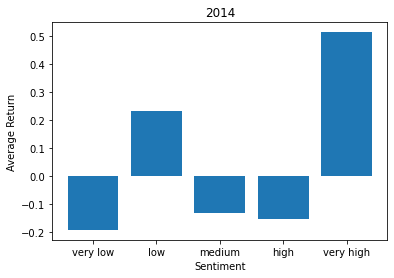

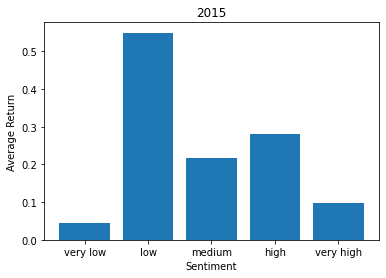

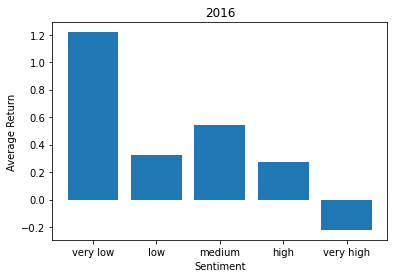

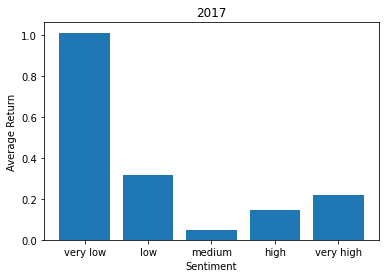

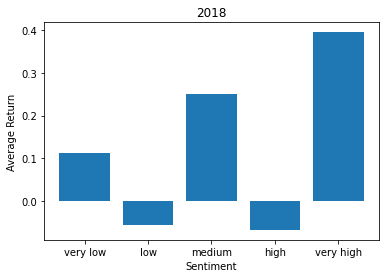

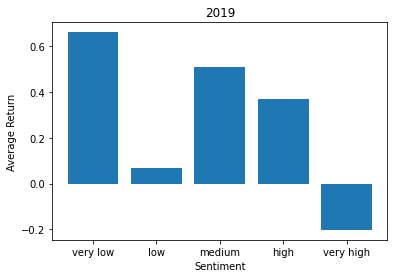

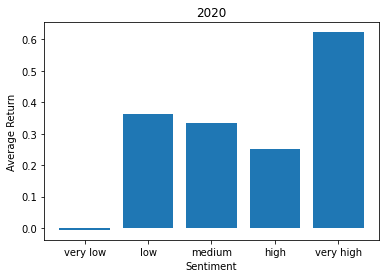

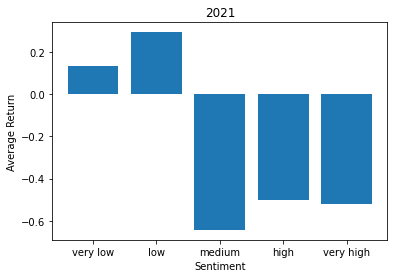

In [8]:
g= df.groupby(pd.Grouper(key='filingDate',freq='Y'))
x=[]
year=[]
label=['very low', 'low', 'medium', 'high', 'very high']
for t in g:
    df1=t[1]
    df_vlow= df1[df1['tone']<df1['tone'].quantile(0.2)]
    df_low=df1[(df1['tone']>df1['tone'].quantile(0.2)) & (df1['tone']<df1['tone'].quantile(0.4))]
    df_medium=df1[(df1['tone']>df1['tone'].quantile(0.4)) & (df1['tone']<df1['tone'].quantile(0.6))]
    df_high=df1[(df1['tone']>df1['tone'].quantile(0.4)) & (df1['tone']<df1['tone'].quantile(0.8))]
    df_vhigh= df1[df1['tone']>df1['tone'].quantile(0.8)]
    bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
    x.append(bars)
    year.append(t[0].year)
def plots(x, label):
    figs={}
    axs={}
    for idx,plot in enumerate(x):
        figs[idx]=plt.figure()
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].bar(label,plot)
    return figs, axs  


figs, axs = plots(x,label)
for i, y in enumerate(year):
    axs[i].set_title(y)
    axs[i].set_xlabel('Sentiment')
    axs[i].set_ylabel('Average Return')


Tone mean: -0.38685635785770794


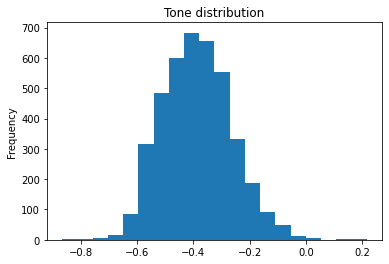

In [9]:
df_tone= df.sort_values('tone', ascending=True)
df['tone'].plot.hist(bins=20, title="Tone distribution")
print("Tone mean:", df['tone'].mean())

<AxesSubplot:title={'center':'% negative distribution'}, ylabel='Frequency'>

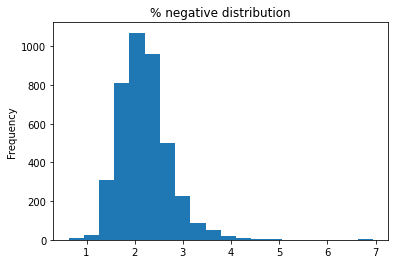

In [10]:
df['% negative'].plot.hist(bins=20, title='% negative distribution', xlabel="Tone")

<AxesSubplot:title={'center':'change dirstribution'}, ylabel='Frequency'>

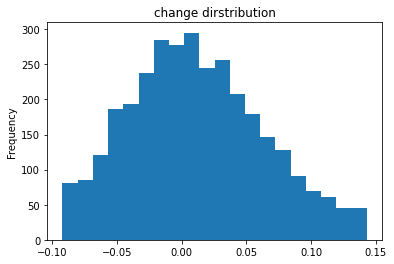

In [11]:
df_change=df.dropna(subset=['change'])

q_low = df_change["change"].quantile(0.05)
q_hi  = df_change["change"].quantile(0.95)
df_change = df_change[(df_change["change"] < q_hi) & (df_change["change"] > q_low)]
df_change['change'].plot.hist(bins=20, title='change dirstribution')



(1804, 8)
0.056216610517517536


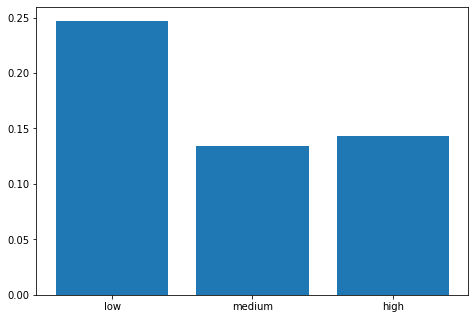

In [12]:
df_vlow= df_change[df_change['change']<-0.2]
df_low=df_change[(df_change['change']>-0.2) & (df_change['change']<0)]
df_medium=df_change[(df_change['change']>0) & (df_change['change']<0.2)]
df_high=df_change[(df_change['change']>df_change['change'].quantile(0.7)) & (df_change['change']<df_change['change'].quantile(0.9))]
df_vhigh= df_change[df_change['change']>0.2]
print(df_medium.shape)
print(df_change['change'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

<AxesSubplot:title={'center':'change dirstribution'}, ylabel='Frequency'>

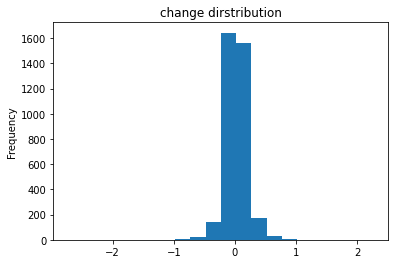

In [13]:
df_change_abs=df.dropna(subset=['change_abs'])

q_low = df_change_abs["change_abs"].quantile(0.05)
q_hi  = df_change_abs["change_abs"].quantile(0.95)
df_change = df_change_abs[(df_change_abs["change_abs"] < q_hi) & (df_change_abs["change_abs"] > q_low)]
df_change_abs['change_abs'].plot.hist(bins=20, title='change dirstribution')

(1904, 8)
0.06415433945344552


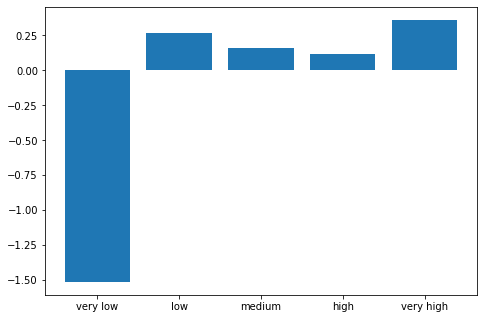

In [14]:
df_change=df_change_abs
df_vlow= df_change[df_change['change']<-0.2]
df_low=df_change[(df_change['change']>-0.2) & (df_change['change']<0)]
df_medium=df_change[(df_change['change']>0) & (df_change['change']<0.2)]
df_high=df_change[(df_change['change']>df_change['change'].quantile(0.7)) & (df_change['change']<df_change['change'].quantile(0.9))]
df_vhigh= df_change[df_change['change']>0.2]
print(df_medium.shape)
print(df_change['change'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

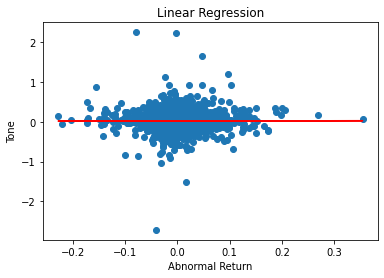

In [15]:
X = df_change.loc[:, 'abnormal_return'].values.reshape(-1, 1)  # iloc[:, 1] is the column of X
Y = df_change.loc[:, 'change_abs'].values.reshape(-1, 1)  # df.iloc[:, 4] is the column of Y
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('Tone')
plt.title('Linear Regression')
plt.show()

(817, 8)
2.561921098903508


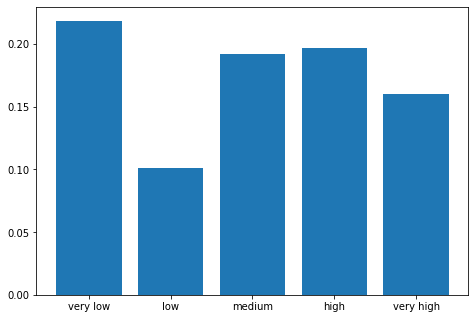

In [16]:
df_vlow= df[df['% negative']>df['% negative'].quantile(0.2)]
df_low=df[(df['% negative']>df['% negative'].quantile(0.2)) & (df['% negative']<df['% negative'].quantile(0.4))]
df_medium=df[(df['% negative']>df['% negative'].quantile(0.4)) & (df['% negative']<df['% negative'].quantile(0.6))]
df_high=df[(df['% negative']>df['% negative'].quantile(0.6)) & (df['% negative']<df['% negative'].quantile(0.8))]
df_vhigh= df[df['% negative']<df['% negative'].quantile(0.8)]
print(df_medium.shape)
print(df['% negative'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean(),df_vhigh['abnormal_return'].mean()])*100
label=['very low', 'low', 'medium', 'high', 'very high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

In [17]:

df1=df[(df['% negative']>df['% negative'].quantile(0.2)) & (df['% negative']<df['% negative'].quantile(0.8))]
df_vlow= df1[df1['% negative']>df1['% negative'].quantile(0.25)]
df_low=df1[(df1['% negative']>df1['% negative'].quantile(0.25)) & (df1['% negative']<df1['% negative'].quantile(0.5))]
df_medium=df1[(df1['% negative']>df1['% negative'].quantile(0.5)) & (df1['% negative']<df1['% negative'].quantile(0.75))]
df_high= df1[df1['% negative']<df1['% negative'].quantile(0.75)]
print(df_medium.shape)
print(df1['% negative'].quantile(0.8))
bars=np.array([df_vlow['abnormal_return'].mean(),df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean())])*100
label=['very low', 'low', 'medium', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (Temp/ipykernel_3124/2123767125.py, line 8)

(808, 8)
2.376595051267266


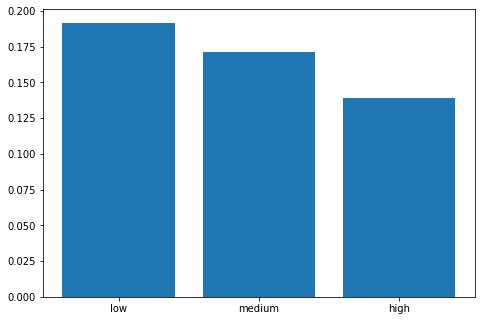

In [18]:
df1=df[(df['% negative']>df['% negative'].quantile(0.2)) & (df['% negative']<df['% negative'].quantile(0.8))]
df_low= df1[df1['% negative']>df1['% negative'].quantile(0.33)]
df_medium=df1[(df1['% negative']>df1['% negative'].quantile(0.33)) & (df1['% negative']<df1['% negative'].quantile(0.66))]
df_high= df1[df1['% negative']<df1['% negative'].quantile(0.66)]
print(df_medium.shape)
print(df1['% negative'].quantile(0.8))
bars=np.array([df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean()])*100
label=['low', 'medium', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

(1102, 8)
2.561921098903508


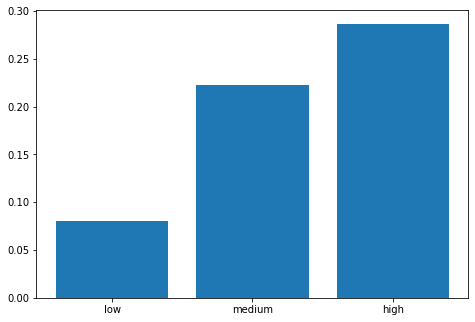

In [19]:
df_low=df[(df['% negative']>df['% negative'].quantile(0.10)) & (df['% negative']<df['% negative'].quantile(0.36))]
df_medium=df[(df['% negative']>df['% negative'].quantile(0.36)) & (df['% negative']<df['% negative'].quantile(0.63))]
df_high=df[(df['% negative']>df['% negative'].quantile(0.63)) & (df['% negative']<df['% negative'].quantile(0.9))]
print(df_medium.shape)
print(df['% negative'].quantile(0.8))
bars=np.array([df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean()])*100
label=['low', 'medium', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

(1102, 8)
-0.28598278885864614


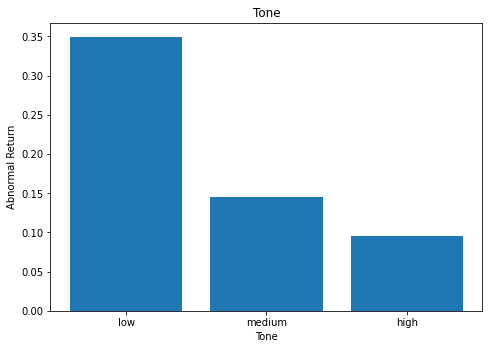

In [20]:
df_low=df[(df['tone']>df['tone'].quantile(0.10)) & (df['tone']<df['tone'].quantile(0.36))]
df_medium=df[(df['tone']>df['tone'].quantile(0.36)) & (df['tone']<df['tone'].quantile(0.63))]
df_high=df[(df['tone']>df['tone'].quantile(0.63)) & (df['tone']<df['tone'].quantile(0.9))]
print(df_medium.shape)
print(df['tone'].quantile(0.8))
bars=np.array([df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean()])*100
label=['low', 'medium', 'high']
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
ax.set_xlabel('Tone')
ax.set_ylabel('Abnormal Return')
ax.set_title('Tone')
plt.show()

(970, 8)
0.13605521405304438


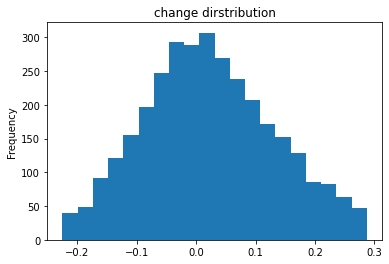

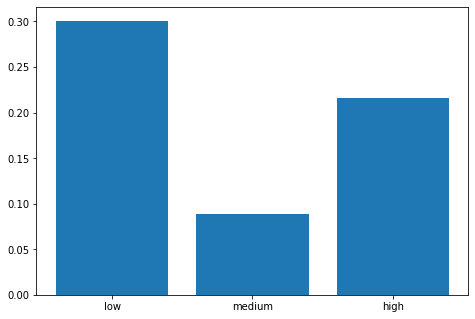

In [21]:
df_change=df.dropna(subset=['change_abs'])

q_low = df_change["change_abs"].quantile(0.05)
q_hi  = df_change["change_abs"].quantile(0.95)
df_change = df_change[(df_change["change_abs"] < q_hi) & (df_change["change_abs"] > q_low)]
df_change['change_abs'].plot.hist(bins=20, title='change dirstribution')

df_low=df[(df['change_abs']>df['change_abs'].quantile(0.10)) & (df['change_abs']<df['change_abs'].quantile(0.36))]
df_medium=df[(df['change_abs']>df['change_abs'].quantile(0.36)) & (df['change_abs']<df['change_abs'].quantile(0.63))]
df_high=df[(df['change_abs']>df['change_abs'].quantile(0.63)) & (df['change_abs']<df['change_abs'].quantile(0.9))]
print(df_medium.shape)
print(df['change_abs'].quantile(0.8))
bars=np.array([df_low['abnormal_return'].mean(),df_medium['abnormal_return'].mean(), df_high['abnormal_return'].mean()])*100
label=['low', 'medium', 'high']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,bars)
plt.show()

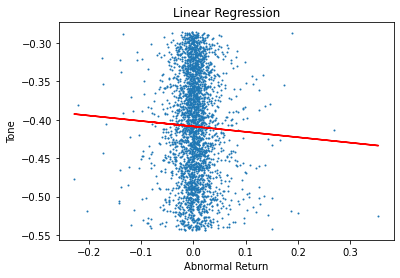

-0.03497443538334804
(2859, 8)


In [22]:
df_correl=df[(df['tone']>df['tone'].quantile(0.1)) & (df['tone']<df['tone'].quantile(0.8))]

X = df_correl.loc[:, 'abnormal_return'].values.reshape(-1, 1)
Y = df_correl.loc[:, 'tone'].values.reshape(-1, 1)  
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, s=1)

plt.plot(X, Y_pred, color='red')
plt.xlabel('Abnormal Return')
plt.ylabel('Tone')
plt.title('Linear Regression')
plt.show()

correlation = df_correl['abnormal_return']. corr(df_correl['tone'])
print(correlation)
print(df_correl.shape)
